# Upper Confidence Bounds (A k-armed bandit problem)
by __Shivangi Agarwal and Sandeep Banik__ | Reinforcement Learning

The __$\epsilon$-Greedy__ provides a method to choose possible actions encouraging exploration. However while choosing the actions at any given time, the method is unbiased and chooses any action with equal probability. One would expect that if an arm/action is choosen multiple times, its estimate is much better as compared to other arms/actions. This is exactly captured by the __Upper-Confidence Bounds__.

<img src="Images/UCB-intro.png" />

<img src="Images/UCB-define.png">

The equation to choose an action is given by, 

$A_{t} = arg \max_{a} \left [ Q_{t}(a) + c\sqrt{\frac{ln(t)}{N_{t}(a)}} \right ] $

$N_t(a)$ is number of times the action $a$ is choosen, which reduces the uncertainity as is present in the denominator. The numerator term, $ln(t)$ keeps increasing with each time step. However, the increase is logarithmic in nature, meaning its influence decreases with each time but is unbounded. $c$ represents the confidence level. We determine the action over,

$ \text{Action}(t)  = arg \max_{a} \left [ \text{Estimate}(t) + \text{upper bound} \right ]$

<img src="Images/UCB-insight.png">

## Code and analysis

In [1]:
#%%
import numpy as np
import matplotlib.pyplot as plt
import math

In [10]:
#%%Initialisations
#total number of bandit arms
n = 10

#total number of experiments
t = 1000

#probability of random exploration(fraction)
upper_bound = []
upper_bound = [2.0,0.1]
c = 0.0

#number of bandits(episodes)
bandit_number = 2000

#optimal action that should be chosen for each bandit
a_opt = np.zeros((bandit_number,n))

#initial same values to all the arms
Q_star = np.random.normal(loc=0,scale=1,size=(bandit_number,n))

#cumulative reward at each episode for chossing an action by probability epsilon
avg_reward = np.asmatrix(np.zeros((len(upper_bound),t)))

#function Bandit taking action and bandit as input, returning reward.
def bandit(a,ids):
    R = np.random.normal(loc=Q_star[ids,a],scale=1,size=1)
    return R

In [12]:
#%%A simple bandit algorithm:crappy cleaning
for k in range(len(upper_bound)):
    N = np.zeros((bandit_number,n))
    Q = np.zeros((bandit_number,n))
    for episode in range(1, t):
        local_reward = 0.0
        action_history = 0.0
        for machine in range(1,bandit_number):
            if (upper_bound[k] == 2.0):
                c == 2.0
                a = np.argmax(Q[machine,:] + c*(np.sqrt(math.log(episode+1))/(N[machine,:]+1)))
            else:
                p = np.random.rand()
                epsilon = upper_bound[k]
                if (p <= epsilon):
                    a = np.random.randint(1,high = n)
                else:
                    a = np.argmax(Q[machine,:])

            rewards = bandit(a,machine)
            
            N[machine,a] = N[machine,a] + 1

            #update the estimate
            Q[machine,a] = Q[machine,a] + (1/N[machine,a])*(rewards-Q[machine,a])
            
            local_reward += rewards
            
            #choosing an optimal action
            idx = np.argmax(Q_star[machine,:])
            action_history += (a ==  idx)
        
        avg_reward[k,episode] = (local_reward/bandit_number)

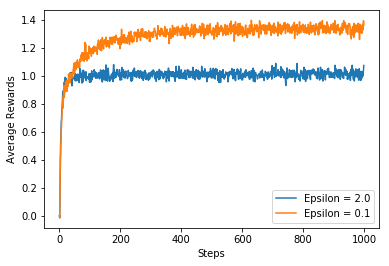

In [14]:
#%%plot graphs for average rewards
for reward in range(len(upper_bound)):
    plt.plot(avg_reward[reward,:].T,label = 'Epsilon = ' + str(upper_bound[reward]))
    plt.xlabel('Steps')
    plt.ylabel('Average Rewards')
    plt.legend()